In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df = pd.read_csv("D:\Aicte internship\Datasets\lung_cancer_dataset_preprocessed.csv")

label_enc = LabelEncoder()
scaler = MinMaxScaler()

categorical_cols = ["Gender", "Smoking_History", "Alcohol_Consumption", "Exercise_Frequency", "Chronic_Diseases"]
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


numerical_cols = ["Age", "Blood_Oxygen_Level", "WBC_Count"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


df.to_csv("D:\Aicte internship\Datasets\lung_cancer_dataset_preprocessed.csv", index=False)

print("Preprocessing completed. File saved as lung_cancer_dataset_preprocessed.csv")


Preprocessing completed. File saved as lung_cancer_dataset_preprocessed.csv


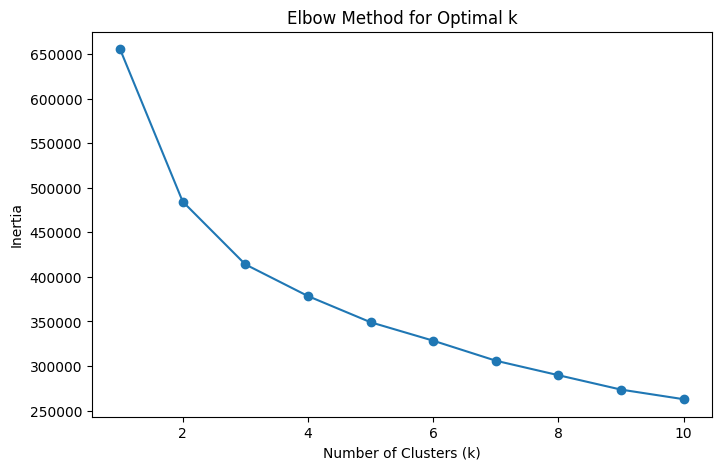

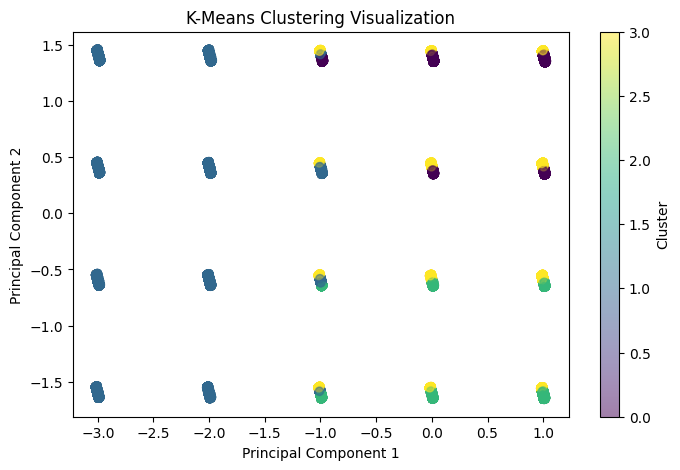

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the preprocessed dataset
df_preprocessed = pd.read_csv("D:\Aicte internship\Datasets\lung_cancer_dataset_preprocessed.csv")

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)  # Checking k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Applying K-Means with the optimal k (choosing k=4 based on common patterns)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_preprocessed["Cluster"] = kmeans.fit_predict(df_preprocessed)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed.drop(columns=["Cluster"]))

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_preprocessed["Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization")
plt.colorbar(label="Cluster")
plt.show()




In [11]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df_clustered = pd.read_csv("D:\Aicte internship\Datasets\lung_cancer_dataset_preprocessed.csv")

# Splitting features and target (Cluster column is the target variable)
X = df_clustered.drop(columns=["Cluster"])
y = df_clustered["Cluster"]

# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model with optimized solver
logreg_model = LogisticRegression(max_iter=500, solver='saga', multi_class='auto', random_state=42, n_jobs=-1)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate model performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Print results
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Confusion Matrix:\n", conf_matrix_logreg)
print("Classification Report:\n", class_report_logreg)


KeyError: "['Cluster'] not found in axis"

In [ ]:
sample_input = np.array([[50, 1, 1, 1, 1, 165, 84, 1, 1, 1,1,22,333]])
predicted_premium = logreg_model.predict(sample_input)
print("Predicted Premium Price:", predicted_premium[0])

Predicted Premium Price: 0


In [ ]:
import pickle 
with open('lungcancer.pkl','wb') as file:
    pickle.dump(logreg_model,file)
with open('lungcancer.pkl','rb') as file:
    loaded_model=pickle.load(file)
print("model loaded sucessfully")

model loaded sucessfully
